# JC3503 Assignment - Apartments

---

Student Name: Liu Kai

Student Email: k.liu2.21@abdn.ac.uk

Student ID: 50079690

---

Additional information about the dataset: https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

The first step is to import the packages and read the data needed for data mining

In [2]:
# Add any pre-requisites or libraries here
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Import the data
data = pd.read_csv("apartments.csv", low_memory=False)

The first step after importing data is still to check whether the data is complete or missing, and then prepare to take appropriate action

In [61]:

# Check for missing values
print(data.isnull().sum())

# Processing missing value（例如：用中位数填充缺失的数值型数据）
data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)
data['bedrooms'].fillna(data['bedrooms'].median(), inplace=True)
data['price'].fillna(data['price'].median(), inplace=True)

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms             0
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                0
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_404\1608294020.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_404\1608294020.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

As can be seen from the above statistics, this data set is not so perfect as students' record that it can be directly used for analysis, but it lacks a lot of data, which is a great obstacle to our analysis. Looking at the number of misses, the first thing we can conclude is that deleting missing values is not a good way to do it, because that would delete 90 percent of the data. Of course, we also have to manually evaluate the importance of missing data. For example, the number of bathrooms is crucial for our prediction, classification, and data analysis. However, there are only a few missing data, so we can adopt a method of median filling to supplement data, while missing data such as addresses and street names can be ignored. Because it doesn't make any difference to our analysis, right

In [54]:
# Exploratory Data Analysis (EDA)

# Summary statistics
print(data.describe())

#Looking at the number of unique values in each column can help us understand the diversity of the data and possible categorical variables.
print(data.nunique())

# Examine the first few lines of the dataset
print(data.head())

                 id     bathrooms      bedrooms         price   square_feet  \
count  9.949200e+04  99429.000000  99492.000000  99492.000000  99492.000000   
mean   5.358321e+09      1.445323      1.728551   1527.055502    956.430688   
std    1.847404e+08      0.547021      0.748795    904.241512    417.571522   
min    5.121046e+09      1.000000      0.000000    100.000000    101.000000   
25%    5.197950e+09      1.000000      1.000000   1013.000000    729.000000   
50%    5.508673e+09      1.000000      2.000000   1350.000000    900.000000   
75%    5.509007e+09      2.000000      2.000000   1795.000000   1115.000000   
max    5.669439e+09      9.000000      9.000000  52500.000000  50000.000000   

           latitude     longitude          time  
count  99467.000000  99467.000000  9.949200e+04  
mean      36.947988    -91.568656  1.559665e+09  
std        4.599461     15.817168  1.105077e+07  
min       19.573800   -159.369800  1.544174e+09  
25%       33.746500   -104.791900  1.5

After the initial processing of the missing data, we can begin a simple analysis of the data. The first step is still to look at the summary of the data, the uniqueness of the data to look at the distribution, and the first few lines that present the data to get an idea of what the data is composed of

<Figure size 1200x1000 with 0 Axes>

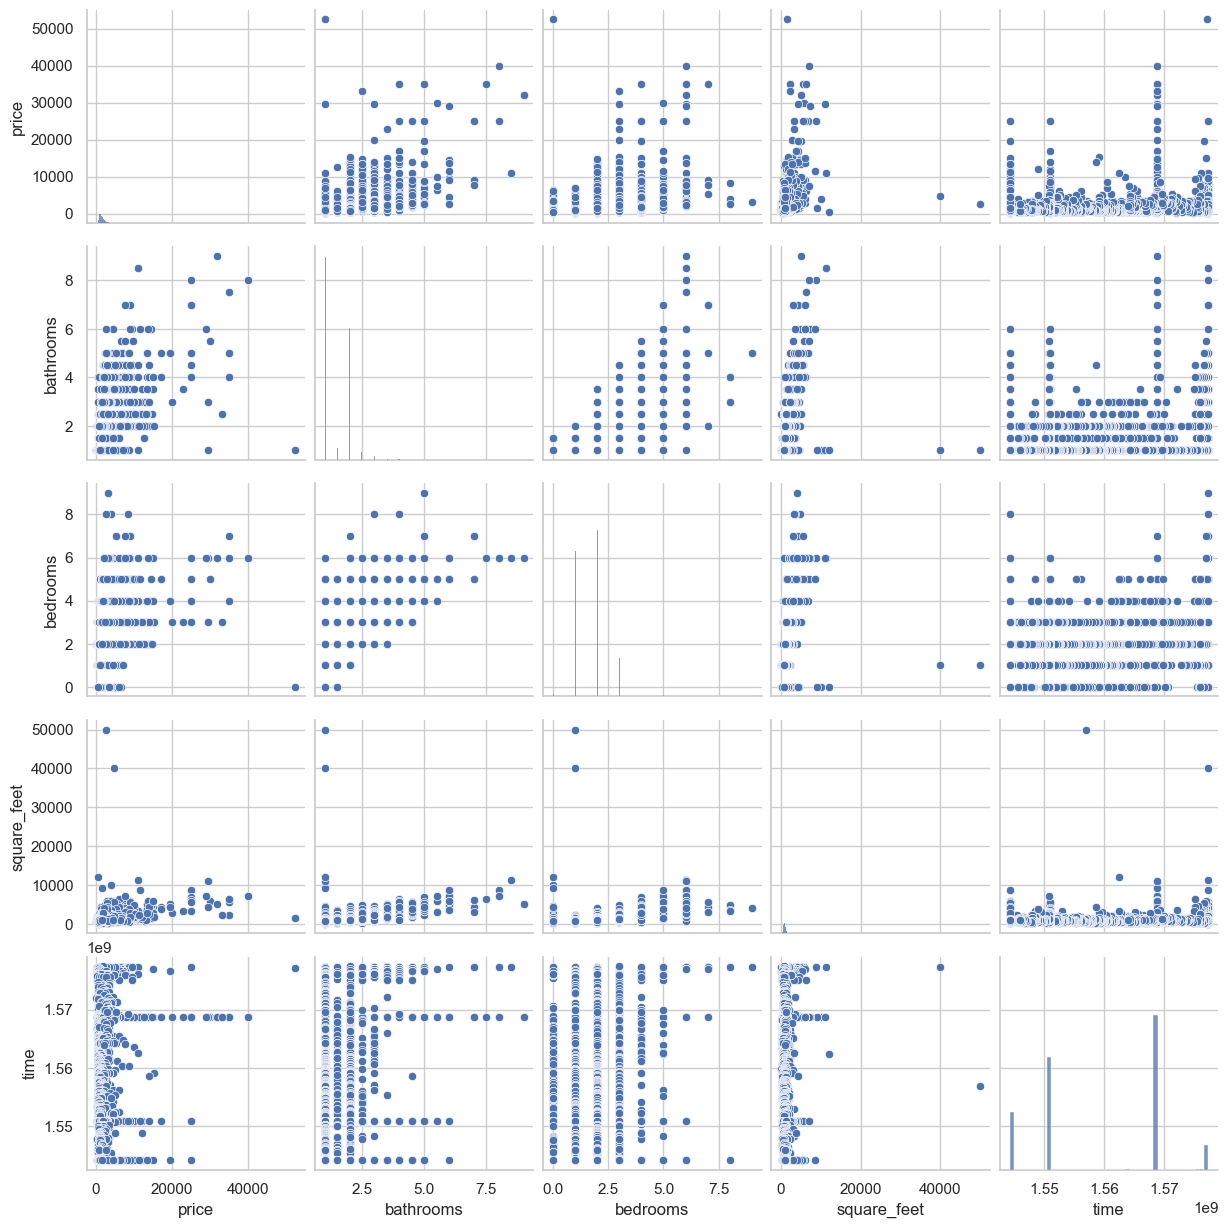

In [100]:
# 成对关系图
plt.figure(figsize=(12, 10))
sns.pairplot(data[['price', 'bathrooms', 'bedrooms', 'square_feet','time']])
plt.show()

Then we carried out pairwise relationship analysis to explore the relationship between different variables, and visualized it with scatter plots

price vs bathrooms:

Houses with more bathrooms generally have higher prices, but there are some exceptions.
Most houses are concentrated in a range with a smaller number of bathrooms (2 to 4 bathrooms) and are in the lower range of prices.

price vs bedrooms:

Houses with more bedrooms also tend to have higher prices.
Most houses have between 2 and 5 bedrooms, and there is a wide range of price variations for these homes.

price vs square_feet:

The price of a house with a larger area is also higher, but there are some cases where the area is large but the price is not high.
Most houses are concentrated in the lower range (1,000 to 5,000 square feet), and prices are spread across a wide range.

price vs time:

There is no clear relationship between time and price, and most of the data points are concentrated in a specific time frame.

Bathrooms vs bedrooms

There is a positive correlation between the number of bedrooms and the number of bathrooms, and the number of bathrooms is also increasing as the number of bedrooms increases.

square_feet vs bathrooms/bedrooms

Larger houses usually have more bathrooms and bedrooms.
Most of the homes are between 1,000 and 5,000 square feet in size, and they have an average number of bedrooms and bathrooms.

time vs other variables:

There is no clear correlation between time and other variables such as price, bathroom, bedroom, and square footage, and most of the data points are concentrated in a specific time frame.

In [108]:
import folium

data = data.dropna(subset=['latitude', 'longitude'])

# Create map Objects
map = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=12)

# Add apartment location
for _, row in data.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['title']).add_to(map)

# 显示地图
map.save("apartments_map.html")

![Map](1.png)

By visualizing the longitude, latitude, and location of houses on the map, we can see the distribution of houses in lots, and analyze house prices from geographical factors such as river or state, and the level of prosperity at a deeper level.

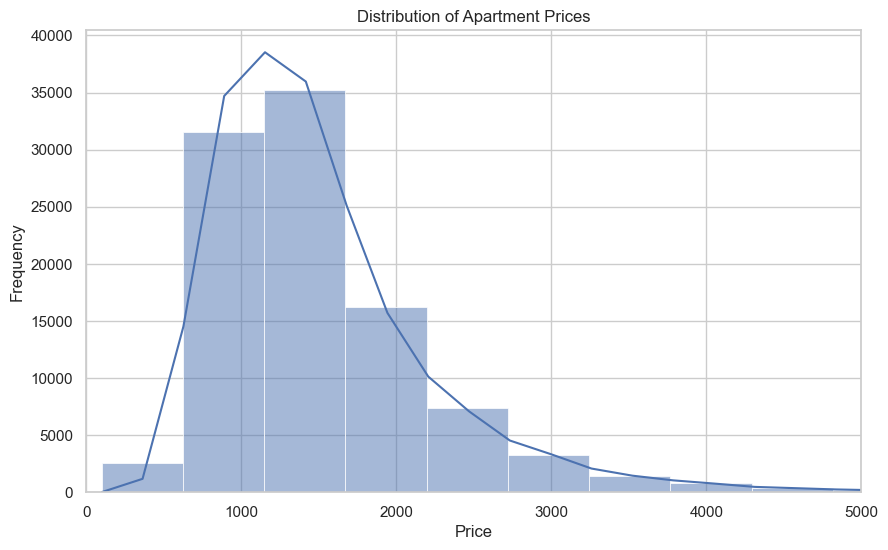

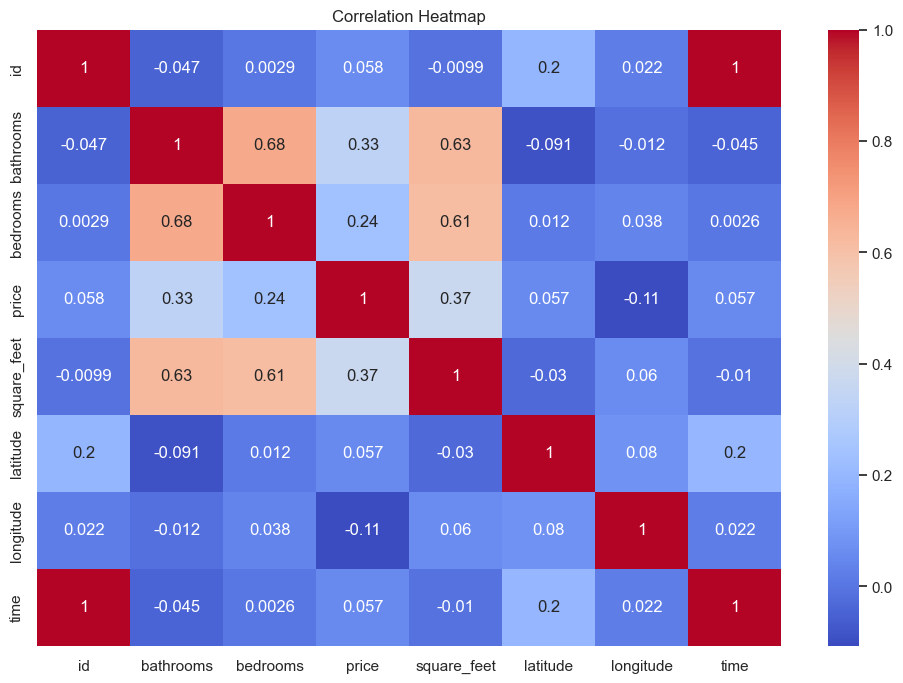

In [86]:

# Plot the price distribution histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=100, kde=True)
plt.title('Distribution of Apartment Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 5000) 
plt.show()


# Correlation heat map: Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Through the histogram, we can see the approximate distribution of prices, and then also show the heat map between different features. In fact, it is similar to paired analysis, studying the relationship between different features, but it is more intuitive, you can see whether it is positive correlation or negative correlation and the degree of correlation directly shown by the value. For example, we can intuitively see that square_feet and bathrooms have the most positive correlation on price compared with other features

As with the previous dataset, after exploratory analysis of the data, we decided to make analytical predictions about the data with a model. And the premise of these steps is to split the data, and then because there are parts of the data set that are missing that may cause problems in subsequent training, you also need to work a little bit to make xy have the same index. Finally, we use selectkbest method for feature selection, which is used for the subsequent model training

In [106]:
from sklearn.feature_selection import SelectKBest, f_regression

# Removes non-numeric columns and target variable columns
numeric_data = data.select_dtypes(include=[np.number])
X = numeric_data.drop(columns=['price'])
y = numeric_data['price']

# Make sure X and y have the same index
X = X.loc[y.index].dropna()
y = y.loc[X.index]

# feature selection approach：SelectKBest
# Choose K best features
selector = SelectKBest(score_func=f_regression, k=6)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
selected_features = list(selected_features)
selected_features.pop(0)
print("Selected features using SelectKBest:", selected_features)




Selected features using SelectKBest: ['bathrooms', 'bedrooms', 'square_feet', 'longitude', 'time']


After the data is segmented, we can start the training. For the data set, we need to realize the classification task, but there is no good label (I can also define the low, middle and high three types of housing in the later, but I use the clustering method here to complete the classification task, and a very important parameter in the clustering is how many clusters the data is divided into. Here we also used the elbow method for selection, and then we used kmeans clustering and visualized the results.

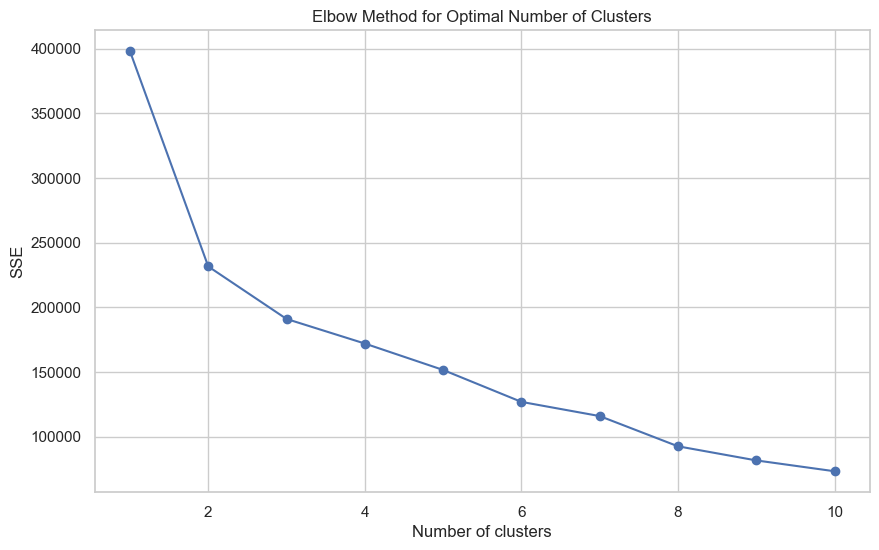

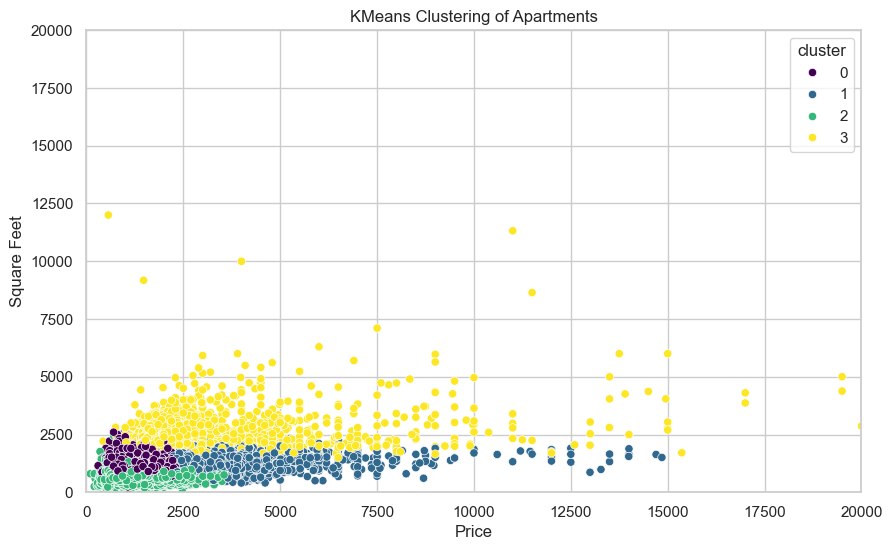

In [97]:
# Data mining (Cluster Analysis)

# Select relevant features and standardize the data
features = ['bathrooms', 'price', 'square_feet','bedrooms']
data_filtered = data[features].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_filtered)

# The elbow method is used to determine the optimal number of clusters
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data_filtered['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_filtered['price'], y=data_filtered['square_feet'], hue=data_filtered['cluster'], palette='viridis')
plt.title('KMeans Clustering of Apartments')
plt.xlabel('Price')
plt.ylabel('Square Feet')
plt.xlim(0, 20000) 
plt.ylim(0, 20000)
plt.show()


Through the elbow method, we can see that the sse of the first 4 drops sharply as the k value increases, but becomes slower after 4, so I decided to classify 4 as the cluster number. At the same time, we can see that the result of the final classification is also quite good, except that there will be some outliers in the last cluster

In addition to the clustering we use, I will also manually divide them into two categories as I said before, and classify them by building decision trees.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Select relevant features and labels 
features1 = ['bathrooms', 'price', 'square_feet']
X1 = data[features1].dropna()
y1 = data['price'].apply(lambda x: 1 if x > data['price'].median() else 0)  # Divide prices into two categories: above or below the median

# Split the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Create and train decision tree models
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# predicted
y_pred = dt_classifier.predict(X_test)

# evaluation model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15062     0]
 [    0 14786]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15062
           1       1.00      1.00      1.00     14786

    accuracy                           1.00     29848
   macro avg       1.00      1.00      1.00     29848
weighted avg       1.00      1.00      1.00     29848



Of course, I also tried to use the regression method to forecast the housing price

Mean Squared Error: 610216.1937842539
R^2 Score: 0.1853983407106209


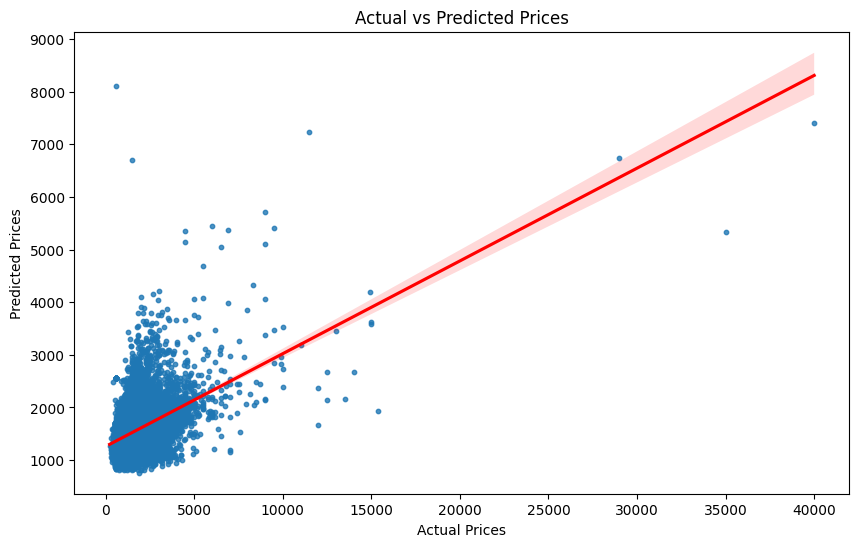

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Regression task: Forecast rental prices
# Feature selection and data standardization
X3 = data[selected_features].dropna()
y3 = data.loc[X.index, 'price']

# Split the training set and test set
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

# standardized data
X_train_scaled3 = scaler.fit_transform(X_train3)
X_test_scaled3 = scaler.transform(X_test3)

# Create and train linear regression models
lr_model = LinearRegression()
lr_model.fit(X_train_scaled3, y_train3)

# predict
y_pred3 = lr_model.predict(X_test_scaled3)

# evaluation model
mse = mean_squared_error(y_test3, y_pred3)
r2 = r2_score(y_test3, y_pred3)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visual prediction results
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test3, y=y_pred3, scatter_kws={'s':10},line_kws={'color': 'red'})
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

Blue scatter: Represents the distribution of actual and predicted prices. Each point represents a sample, with the horizontal coordinate being the actual price and the vertical coordinate being the predicted price.

Red line: This is the trend line (i.e. the fit line) of the regression prediction and represents the linear relationship between the predicted value and the actual value.

Shaded areas in red: represent the confidence interval of the regression line, showing the uncertainty of the forecast.

We can see from the graph that most of the data points are concentrated in the region of lower prices (between 1000 and 2000), but there are also some outliers of higher prices (such as above 20,000).
The forecast for the low price area is more accurate because the data points are closer to the red trend line. However, there is a large deviation in the forecast of the high price area, with many points away from the trend line.

The red line in the graph represents the predicted trend of the linear regression model. While the predictions for low price regions were more accurate, the overall model performed poorly, especially for high price regions. We can also see from R2 and MSE that the model needs to further optimize the model and data processing process to improve the prediction accuracy.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14900\1576341825.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bedrooms', y='price', data=avg_price_by_bedrooms, palette='viridis')


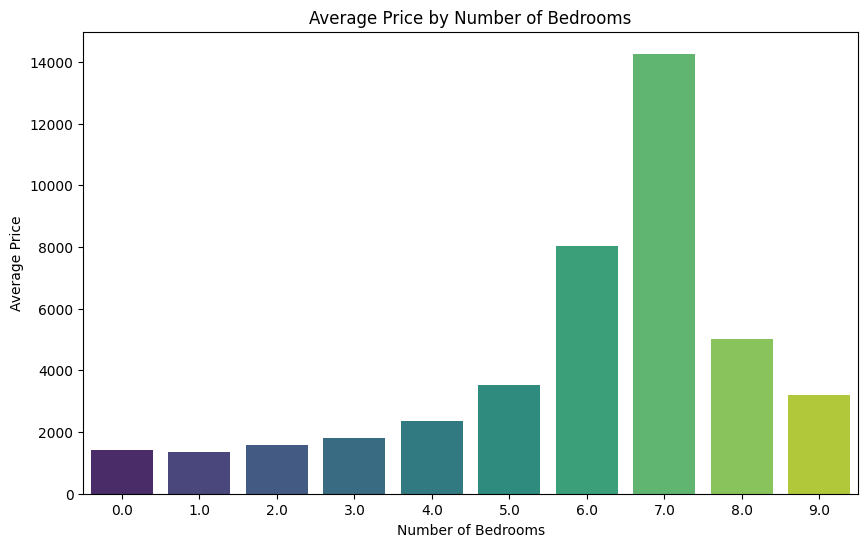

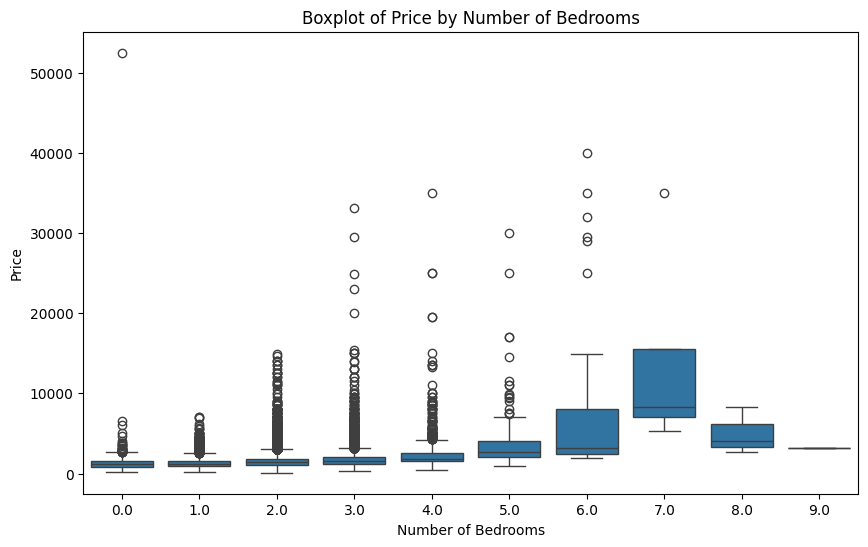

In [3]:
# Data visualization

# Plot a bar chart of the average price per number of bedrooms
avg_price_by_bedrooms = data.groupby('bedrooms')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='price', data=avg_price_by_bedrooms, palette='viridis')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()

# box plots

plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=data)
plt.title('Boxplot of Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Save the cleaned data set for further analysis
data.to_csv('cleaned_apartments.csv', index=False)

Finally, we adopt the bar chart and box chart to analyze the relationship between bedrooms quantity and price, because they are the most positively correlated according to common sense.

As the number of bedrooms has increased, so has the average price of an apartment.
In particular, the average price of apartments with 6 and 7 bedrooms is significantly higher than other types.
The lower average prices for eight - and nine-bedroom apartments may be due to smaller sample sizes or other factors.

The price distribution shows the range of price changes in apartments for each number of bedrooms.
As can be seen from the box plot, the median price increases with the number of bedrooms.
There is a wider range of price variations for apartments with 6 and 7 bedrooms, and there are some unusually high prices for these types of apartments.

Overall, there is a positive correlation between the number of bedrooms and the price of the apartment, that is, the more bedrooms, the higher the price of the apartment.
Both the average price and outlier points of apartments with 6 and 7 bedrooms are significantly higher than other types of apartments, indicating that these types of apartments may offer more amenities or more space and therefore have a higher price.
Prices are more volatile, especially for apartments with more bedrooms.
The presence of outliers indicates that there are some extreme priced apartments in the market, which may be due to location, amenities, or other factors.